Importing the packages

In [9]:
import numpy
import scipy
import pandas
import matplotlib.pyplot as plt
import sklearn

Let's read the data, which contains the immigration statistics of Canada

In [10]:
df = pandas.read_csv('immigration_Canada.csv')
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
3,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
4,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45


We will examine the statistics for the year 1984, getting rid of the other columns

In [11]:
df1984 = df.loc[:, ['OdName', '1984']]
df1984.head()

,OdName,1984
0,Afghanistan,71
1,Albania,0
2,American Samoa,0
3,Andorra,0
4,Angola,4


We can use dataframe's built-in methods to access various statistics:

In [12]:
values = df1984['1984']  # to avoid calling df1984['1984'] every time
average = values.mean()
median = values.median()
mode = values.mode()
print(f"Average: {average:.2f}, median: {median}, mode: {mode}")

Average: 293.14, median: 8.0, mode: 0    0
dtype: int64


Mode is equal to 0, which makes sense since countries sharing the same immigration numbers is a rare event.
Let's examine the immigration numbers of countries in Western Asia for the years between 1984-2013. It's easier to work with visualized data, so we'll use the built-in boxplot function of pandas.

On a side note, f-string, used in the print statement, is a really useful feature, more features can be found [here](https://zetcode.com/python/fstring/).

<AxesSubplot:>

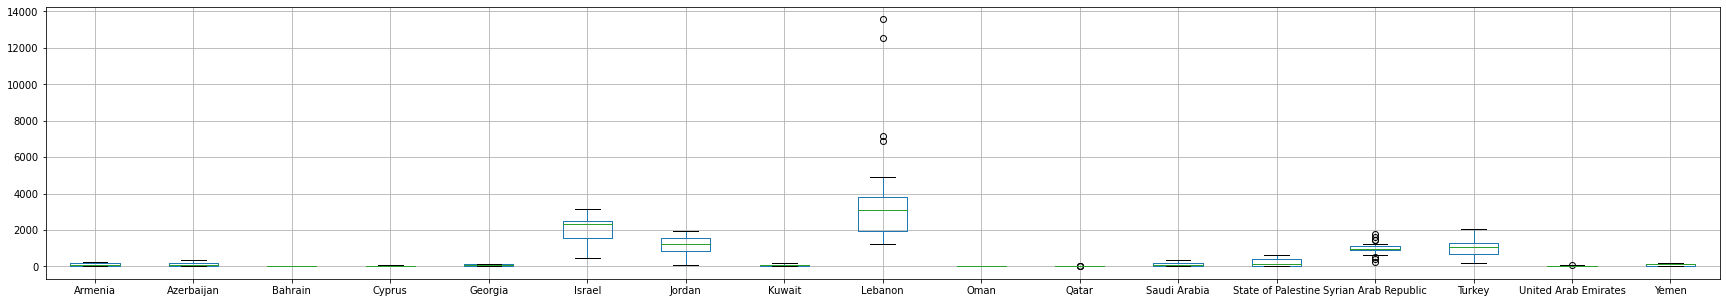

In [13]:
years_to_analyze = [f'{year}' for year in range(1984, 2013)]
df_western_asia = df.loc[df['RegName'] == 'Western Asia']  # filter by column value
"""
Since we'll draw a boxplot for each country and use the columns as the values, we'll
need to work with the transpose of the df
"""
df_western_asia.set_index('OdName')  # change indexing to country names
# df_western_asia.drop()
df_western_asia.set_index('OdName').loc[:, years_to_analyze].T.boxplot(figsize=(30,5))

The other dataset is the weight and height data collected from 25,000 humans at age 18.

In [14]:
hw_df = pandas.read_csv('weight-height.csv')
hw_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


The measurements are in inches and pounds, let's convert them to metric system and calculate the BMI for each data point.

In [15]:
hw_df['HeightCm'] = hw_df['Height'] * 2.54
hw_df['WeightKg'] = hw_df['Weight'] * 0.453592
hw_df['BMI'] = hw_df['WeightKg'] / hw_df['HeightCm'] ** 2 * 1e4
hw_df.head()

,Gender,Height,Weight,HeightCm,WeightKg,BMI
0,Male,73.847017,241.893563,187.571423,109.720985,31.185761
1,Male,68.781904,162.310473,174.706036,73.622732,24.121044
2,Male,74.110105,212.740856,188.239668,96.497550,27.232906
3,Male,71.730978,220.042470,182.196685,99.809504,30.067059
4,Male,69.881796,206.349801,177.499761,93.598619,29.708033


Examining the height values:

count    10000.000000
mean       168.573602
std          9.772721
min        137.828359
25%        161.304276
50%        168.447898
75%        175.702625
max        200.656806
Name: HeightCm, dtype: float64

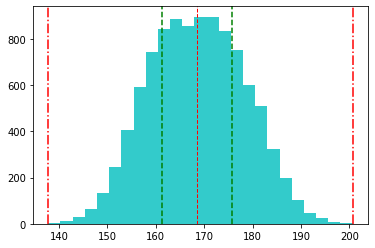

In [28]:
height_cm = hw_df['HeightCm']
fig, ax = plt.subplots()
ax.hist(height_cm, bins=25, color='c', alpha=0.8)  # histogram
ax.axvline(height_cm.mean(), color='r', linestyle='dashed', linewidth=1)  # adding a mean line
# including the quantiles
ax.axvline(height_cm.quantile(0),color='r', linestyle='-.')
ax.axvline(height_cm.quantile(0.25),color='g', linestyle='--')
# ax.axvline(height_cm.quantile(0.50),color='y', linestyle='--')  # mean and median are too close, better to draw only one of them
ax.axvline(height_cm.quantile(0.75),color='g', linestyle='--')
ax.axvline(height_cm.quantile(1),color='r', linestyle='-.')
height_cm.describe()

Coefficient of variation:

In [31]:
print(f"CV = {height_cm.describe()['std'] / height_cm.describe()['mean'] * 100:.2f}%")

CV = 5.80%
